In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib as pyplot 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

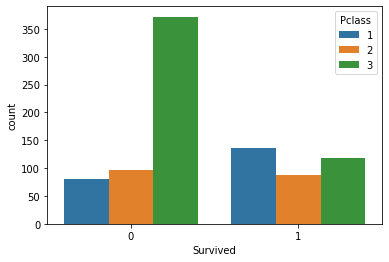

In [5]:
sns.countplot(x='Survived',hue='Pclass',data=data);

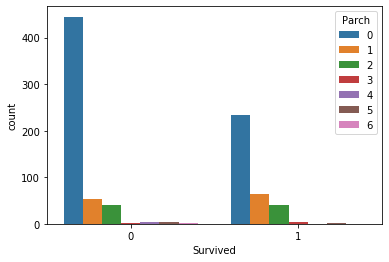

In [6]:
sns.countplot(x='Survived',hue='Parch',data=data);

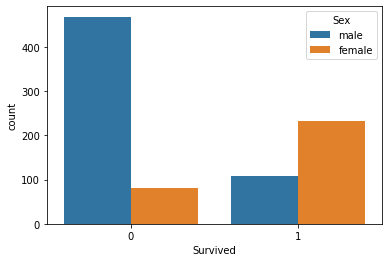

In [7]:
sns.countplot(x='Survived',hue='Sex',data=data);

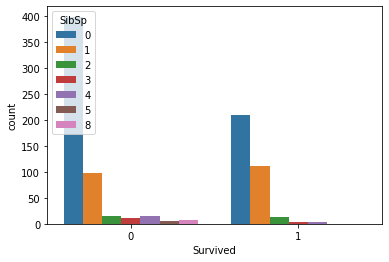

In [8]:
sns.countplot(x='Survived',hue='SibSp',data=data);

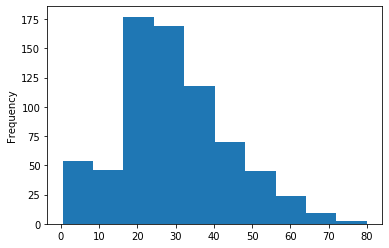

In [9]:
data['Age'].plot.hist()

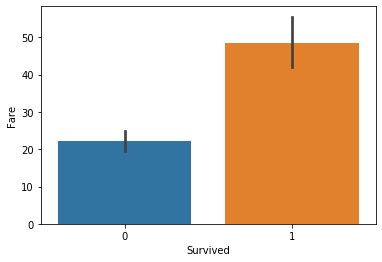

In [10]:
sns.barplot(x='Survived',y='Fare',data=data)

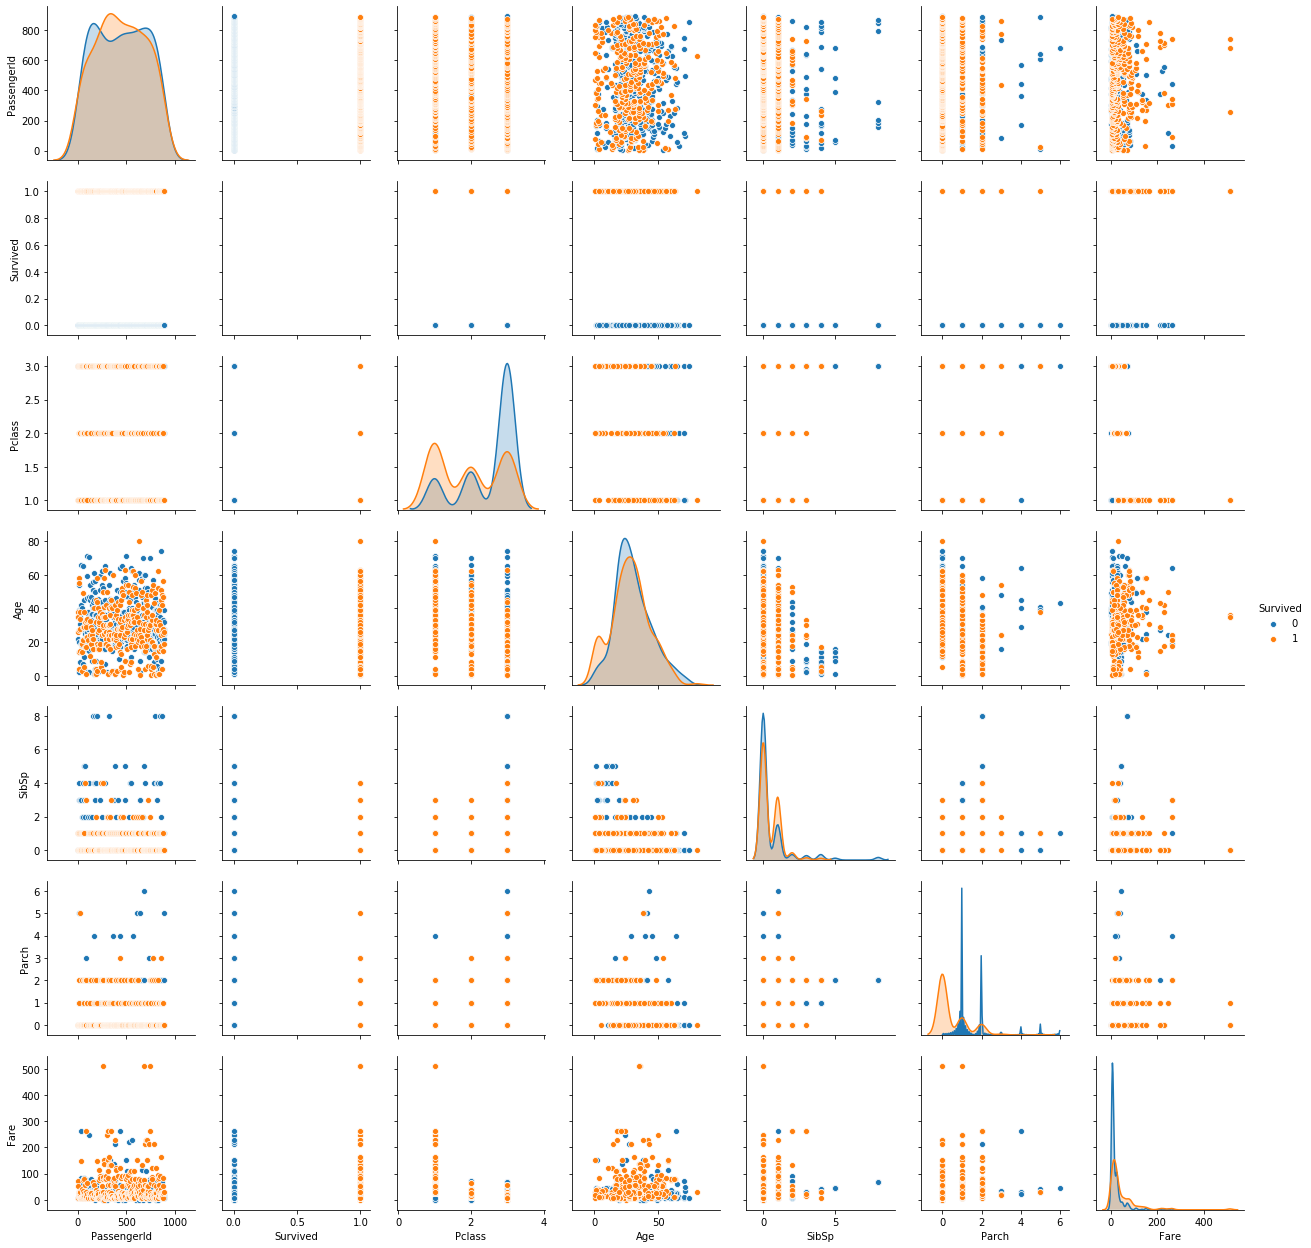

In [11]:
sns.pairplot(data,hue='Survived');

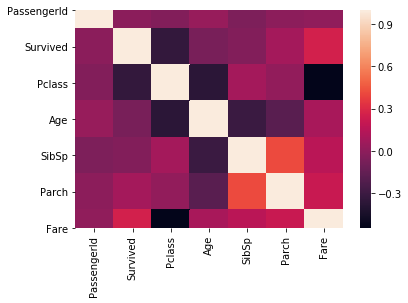

In [12]:
sns.heatmap(data.corr())

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [15]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [16]:
data['Embarked']=data['Embarked'].fillna('S')

In [17]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [18]:
data.loc[data['Embarked']=='S','Embarked']=0
data.loc[data['Embarked']=='C','Embarked']=1
data.loc[data['Embarked']=='Q','Embarked']=2

In [19]:
data.loc[data['Sex']=='male','Sex']=0
data.loc[data['Sex']=='female','Sex']=1



In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [21]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [22]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [23]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       1.661245
Parch       1.675439
Fare        0.394928
Embarked    1.254648
dtype: float64

Survived       AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Pclass      AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Sex         AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Age         AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
SibSp       AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Parch       AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Fare        AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Embarked    AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
dtype: object

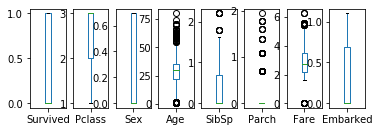

In [24]:
data.plot(kind='box',subplots=True,layout=(2,8))

In [25]:
from scipy.stats import zscore 
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(891, 8)
(844, 8)


In [26]:
df_x=data_final.drop('Survived',axis=1)
y=data_final['Survived']

In [27]:
df_x.skew()

Pclass     -0.631176
Sex         0.594266
Age         0.275362
SibSp       1.409871
Parch       1.604684
Fare        0.955913
Embarked    1.216015
dtype: float64

In [28]:
df_x.shape,y.shape

((844, 7), (844,))

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss=StandardScaler()
x=ss.fit_transform(df_x)

In [31]:
x=pd.DataFrame(x)


In [32]:
x.skew()

0   -0.631176
1    0.594266
2    0.275362
3    1.409871
4    1.604684
5    0.955913
6    1.216015
dtype: float64

In [33]:
x.shape,y.shape

((844, 7), (844,))

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [35]:
for i in range(42,102):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    
    print( 'the accuracy score for random state:',i,'is:',acc_score)

the accuracy score for random state: 42 is: 0.8106508875739645
the accuracy score for random state: 43 is: 0.7869822485207101
the accuracy score for random state: 44 is: 0.7633136094674556
the accuracy score for random state: 45 is: 0.8520710059171598
the accuracy score for random state: 46 is: 0.7928994082840237
the accuracy score for random state: 47 is: 0.7988165680473372
the accuracy score for random state: 48 is: 0.7514792899408284
the accuracy score for random state: 49 is: 0.8224852071005917
the accuracy score for random state: 50 is: 0.7928994082840237
the accuracy score for random state: 51 is: 0.7928994082840237
the accuracy score for random state: 52 is: 0.834319526627219
the accuracy score for random state: 53 is: 0.7751479289940828
the accuracy score for random state: 54 is: 0.8047337278106509
the accuracy score for random state: 55 is: 0.7988165680473372
the accuracy score for random state: 56 is: 0.8224852071005917
the accuracy score for random state: 57 is: 0.7514792899

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,y_pred))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,y_pred))
print('\nClassification report is :',classification_report(y_test,y_pred))

Accuracy score is
 : 0.8520710059171598

Confusion matirx is :
 [[81 12]
 [13 63]]

Classification report is :               precision    recall  f1-score   support

           0       0.86      0.87      0.87        93
           1       0.84      0.83      0.83        76

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169



In [37]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())

[0.78235294 0.78106509 0.75739645 0.7797619  0.80357143]
0.7808295625942684


In [38]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,20):

    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predknn=knn.predict(x_test)
    acc_score=accuracy_score(y_test,predknn)
    print('the accuracy score for ',i,'n_neighbors is:',acc_score)


the accuracy score for  1 n_neighbors is: 0.7633136094674556
the accuracy score for  2 n_neighbors is: 0.7869822485207101
the accuracy score for  3 n_neighbors is: 0.8402366863905325
the accuracy score for  4 n_neighbors is: 0.834319526627219
the accuracy score for  5 n_neighbors is: 0.8402366863905325
the accuracy score for  6 n_neighbors is: 0.8402366863905325
the accuracy score for  7 n_neighbors is: 0.863905325443787
the accuracy score for  8 n_neighbors is: 0.8757396449704142
the accuracy score for  9 n_neighbors is: 0.8816568047337278
the accuracy score for  10 n_neighbors is: 0.8579881656804734
the accuracy score for  11 n_neighbors is: 0.8816568047337278
the accuracy score for  12 n_neighbors is: 0.8816568047337278
the accuracy score for  13 n_neighbors is: 0.8875739644970414
the accuracy score for  14 n_neighbors is: 0.8757396449704142
the accuracy score for  15 n_neighbors is: 0.8757396449704142
the accuracy score for  16 n_neighbors is: 0.893491124260355
the accuracy score f

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,predknn))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,predknn))
print('\nClassification report is :',classification_report(y_test,predknn))

Accuracy score is
 : 0.893491124260355

Confusion matirx is :
 [[88  5]
 [13 63]]

Classification report is :               precision    recall  f1-score   support

           0       0.87      0.95      0.91        93
           1       0.93      0.83      0.88        76

    accuracy                           0.89       169
   macro avg       0.90      0.89      0.89       169
weighted avg       0.90      0.89      0.89       169



In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=2)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,preddtc))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,preddtc))
print('\nClassification report is :',classification_report(y_test,preddtc))


Accuracy score is
 : 0.863905325443787

Confusion matirx is :
 [[85  8]
 [15 61]]

Classification report is :               precision    recall  f1-score   support

           0       0.85      0.91      0.88        93
           1       0.88      0.80      0.84        76

    accuracy                           0.86       169
   macro avg       0.87      0.86      0.86       169
weighted avg       0.87      0.86      0.86       169



In [60]:
from sklearn.ensemble import RandomForestClassifier
for i in range(28,201):
    
    rfc=RandomForestClassifier(random_state=163,n_estimators=i)
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    acc_score=accuracy_score(y_test,predrfc)
    if acc_score>=0.8875:
        
        print('the accuracy score for n estimators :',i,'is:',acc_score)

In [42]:
for i in range(1,31):
    
    rfc=RandomForestClassifier(n_estimators=164,random_state=45,max_depth=i)
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    acc_score=accuracy_score(y_test,predrfc)
    if acc_score>0.89:
        
        print('the accuracy score for n estimators :',i,'is:',acc_score)

the accuracy score for n estimators : 8 is: 0.893491124260355
the accuracy score for n estimators : 9 is: 0.8994082840236687
the accuracy score for n estimators : 10 is: 0.893491124260355


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=164,random_state=45,max_depth=9)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,predrfc))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,predrfc))
print('\nClassification report is :',classification_report(y_test,predrfc))



Accuracy score is
 : 0.8994082840236687

Confusion matirx is :
 [[85  8]
 [ 9 67]]

Classification report is :               precision    recall  f1-score   support

           0       0.90      0.91      0.91        93
           1       0.89      0.88      0.89        76

    accuracy                           0.90       169
   macro avg       0.90      0.90      0.90       169
weighted avg       0.90      0.90      0.90       169



In [44]:
from sklearn.ensemble import GradientBoostingClassifier
abc=GradientBoostingClassifier()
for i in range(45,200):
    
    abc=GradientBoostingClassifier(random_state=i,n_estimators=i,max_depth=i)
    abc.fit(x_train,y_train)
    predabc=abc.predict(x_test)
    acc_score=accuracy_score(y_test,predabc)
    if acc_score>0.87:
        
        print('the accuracy score for random_state',i,'and  n estimators :',i,'is:',acc_score)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
abc=GradientBoostingClassifier(n_estimators=53,random_state=45,learning_rate=0.1,max_depth=5)
abc.fit(x_train,y_train)
predabc=abc.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,predabc))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,predabc))
print('\nClassification report is :',classification_report(y_test,predabc))



Accuracy score is
 : 0.8816568047337278

Confusion matirx is :
 [[84  9]
 [11 65]]

Classification report is :               precision    recall  f1-score   support

           0       0.88      0.90      0.89        93
           1       0.88      0.86      0.87        76

    accuracy                           0.88       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.88      0.88      0.88       169



In [46]:
from sklearn.ensemble import GradientBoostingClassifier
abc=GradientBoostingClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,predabc))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,predabc))
print('\nClassification report is :',classification_report(y_test,predabc))



Accuracy score is
 : 0.863905325443787

Confusion matirx is :
 [[84  9]
 [14 62]]

Classification report is :               precision    recall  f1-score   support

           0       0.86      0.90      0.88        93
           1       0.87      0.82      0.84        76

    accuracy                           0.86       169
   macro avg       0.87      0.86      0.86       169
weighted avg       0.86      0.86      0.86       169



In [47]:
from xgboost import XGBClassifier

In [48]:
xgb=XGBClassifier(random_state=45,learning_rate=0.1,max_depth=10,colsample_bytree=1)
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,predxgb))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,predxgb))
print('\nClassification report is :',classification_report(y_test,predxgb))


Accuracy score is
 : 0.8816568047337278

Confusion matirx is :
 [[85  8]
 [12 64]]

Classification report is :               precision    recall  f1-score   support

           0       0.88      0.91      0.89        93
           1       0.89      0.84      0.86        76

    accuracy                           0.88       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.88      0.88      0.88       169



In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
ab=AdaBoostClassifier(random_state=45,base_estimator=rfc)
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print('Accuracy score is\n :',accuracy_score(y_test,predab))
print('\nConfusion matirx is :\n',confusion_matrix(y_test,predab))
print('\nClassification report is :',classification_report(y_test,predab))


Accuracy score is
 : 0.8579881656804734

Confusion matirx is :
 [[79 14]
 [10 66]]

Classification report is :               precision    recall  f1-score   support

           0       0.89      0.85      0.87        93
           1       0.82      0.87      0.85        76

    accuracy                           0.86       169
   macro avg       0.86      0.86      0.86       169
weighted avg       0.86      0.86      0.86       169

